In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive", force_remount=True)



Mounted at /content/drive


In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the dataset (pixel values between 0 and 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Check the dataset shape
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


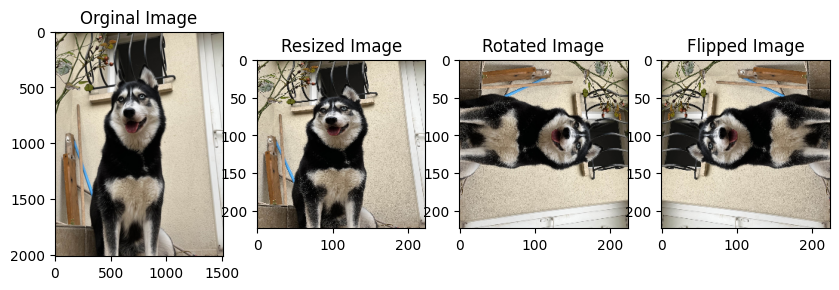

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Part 1: Image Preprocessing with OpenCV and displaying with matplotlib
def preprocess_image(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Resize the image
    img_resized = cv2.resize(img, (224, 224))

    # Rotate the image by 90 degrees clockwise
    img_rotated = cv2.rotate(img_resized, cv2.ROTATE_90_CLOCKWISE)

    # Flip the image horizontally
    img_flipped = cv2.flip(img_rotated, 1)

    # Convert BGR (OpenCV format) to RGB (for matplotlib display)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_rotated_rgb = cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB)
    img_flipped_rgb = cv2.cvtColor(img_flipped, cv2.COLOR_BGR2RGB)

    # Display the processed images using matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.title('Orginal Image')

    plt.subplot(1, 4, 2)
    plt.imshow(img_resized_rgb)
    plt.title('Resized Image')

    plt.subplot(1, 4, 3)
    plt.imshow(img_rotated_rgb)
    plt.title('Rotated Image')

    plt.subplot(1, 4, 4)
    plt.imshow(img_flipped_rgb)
    plt.title('Flipped Image')

    plt.show()

# Example usage
preprocess_image('/content/drive/MyDrive/Computer vision/husky.png')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Part 2: Build a CNN Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3317 - loss: 1.7894 - val_accuracy: 0.5445 - val_loss: 1.2644
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.5676 - loss: 1.2113 - val_accuracy: 0.6027 - val_loss: 1.1213
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6359 - loss: 1.0357 - val_accuracy: 0.6220 - val_loss: 1.0715
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6721 - loss: 0.9431 - val_accuracy: 0.6618 - val_loss: 0.9726
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7001 - loss: 0.8548 - val_accuracy: 0.6870 - val_loss: 0.9154
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7216 - loss: 0.7990 - val_accuracy: 0.7023 - val_loss: 0.8689
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7404 - loss: 0.7426 - val_accuracy: 0.7035 - val_loss: 0.8604
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7577 - loss: 0.6989 

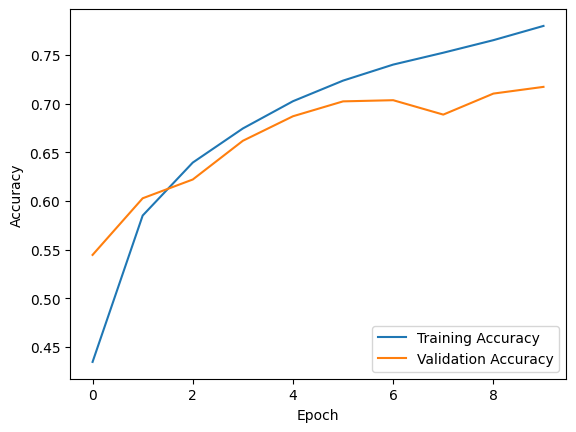

In [ ]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7224 - loss: 0.8446
Test accuracy: 0.717199981212616


In [ ]:
# Save the trained model
model.save('cnn_image_classification.h5')


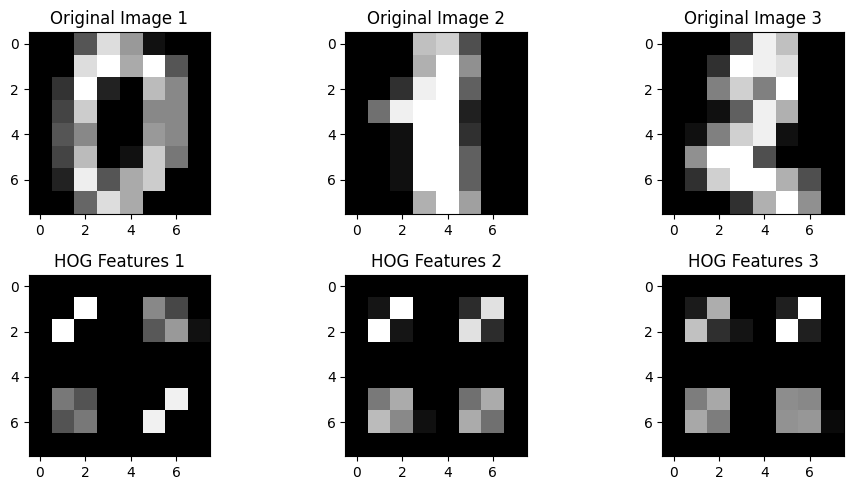

In [ ]:
# Part 3: HOG Feature Extraction and SVM Classification
from sklearn import datasets
digits = datasets.load_digits()
x = digits.images
y = digits.target


plt.figure(figsize=(10, 5))
for i in range(3):
    image = x[i]


    hog_features, hog_image = hog(image, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)

    plt.subplot(2, 3, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Original Image {i+1}')

    plt.subplot(2, 3, i+4)
    plt.imshow(hog_image, cmap='gray')
    plt.title(f'HOG Features {i+1}')

plt.tight_layout()
plt.show()

Test accuracy using HOG and SVM: 0.8611111111111112


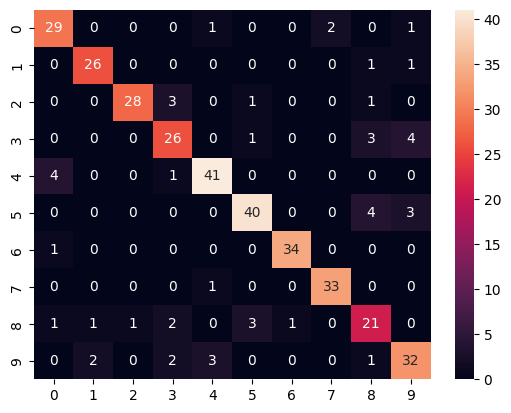

In [ ]:
hog_features_list = []
hog_images = []
for image in x:
    hog_features, hog_image = hog(image, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)
    hog_features_list.append(hog_features)
    hog_images.append(hog_image)


x_train_hog, x_test_hog, y_train_hog, y_test_hog, x_train_images, x_test_images = train_test_split(
    hog_features_list, y, x, test_size=0.2, random_state=42)


clf = SVC(kernel='linear')
clf.fit(x_train_hog, y_train_hog)

y_pred_hog = clf.predict(x_test_hog)
accuracy_hog = accuracy_score(y_test_hog, y_pred_hog)
print(f"Test accuracy using HOG and SVM: {accuracy_hog}")


cm_hog = confusion_matrix(y_test_hog, y_pred_hog)
sns.heatmap(cm_hog, annot=True)
plt.show()

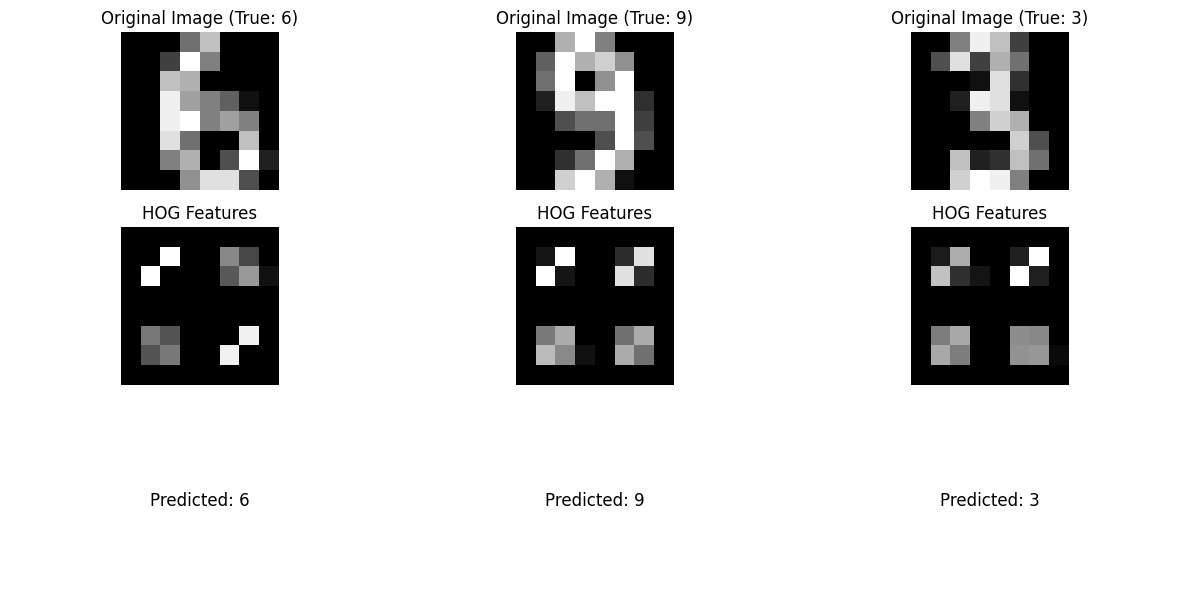

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(3):

    plt.subplot(3, 3, i+1)
    plt.imshow(x_test_images[i], cmap='gray')
    plt.title(f'Original Image (True: {y_test_hog[i]})')
    plt.axis('off')


    plt.subplot(3, 3, i+4)
    plt.imshow(hog_images[i], cmap='gray')
    plt.title('HOG Features')
    plt.axis('off')


    plt.subplot(3, 3, i+7)
    plt.text(0.5, 0.5, f'Predicted: {y_pred_hog[i]}', fontsize=12, ha='center', va='center')
    plt.gca().set_frame_on(False)
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


In [ ]:
# Part 4: Data Augmentation using ImageDataGenerator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

# Train using the augmented data generator
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10)


Epoch 1/10
   1/1563 ━━━━━━━━━━━━━━━━━━━━ 5:04 195ms/step - accuracy: 0.6875 - loss: 1.0649

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5797 - loss: 1.1930
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.5858 - loss: 1.1686
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.5885 - loss: 1.1652
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.5957 - loss: 1.1490
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6012 - loss: 1.1318
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - accuracy: 0.6052 - loss: 1.1214
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.6121 - loss: 1.1069
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.6141 - loss: 1.0997
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6141 - loss: 1.0980
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 33ms/step - accuracy: 0.6251 - loss: 1.0789


In [ ]:
# Part 5: Model Evaluation and Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True)
plt.show()


In [ ]:
# Part 6: Model Saving
model.save('final_model_image_classification.h5')
